In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\basde\Downloads\playground-series-s3e24\train.csv")

In [3]:
X = df.drop(columns=['id', 'smoking'])

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
cov_matrix = np.cov(X_scaled, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vector = np.mean(X_scaled, axis=0)

In [6]:
mahal_dist_sq = np.array([
    (obs - mean_vector).T @ inv_cov_matrix @ (obs - mean_vector)
    for obs in X_scaled
])

In [15]:
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

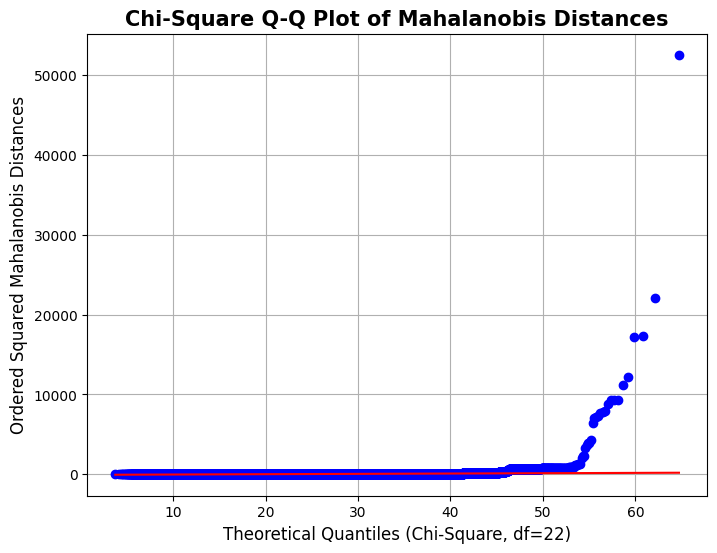

In [7]:
# --- 4. Generate the Q-Q Plot ---
# The degrees of freedom (dof) equals the number of features.
dof = X.shape[1]

# Create the probability plot using scipy.stats.probplot.
plt.figure(figsize=(8, 6))
stats.probplot(mahal_dist_sq, dist="chi2", sparams=(dof,), plot=plt)

plt.title('Chi-Square Q-Q Plot of Mahalanobis Distances', fontsize=15, weight='bold')
plt.xlabel(f'Theoretical Quantiles (Chi-Square, df={dof})', fontsize=12)
plt.ylabel('Ordered Squared Mahalanobis Distances', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# How to Interpret the Plot 🧐

#     Multivariate Normal Data: If your data follows a multivariate normal distribution, the blue dots will align closely with the red reference line.

#     Non-Normal Data: If the blue dots systematically deviate from the red line (especially at the ends, forming a curve like in the example plot), it's a strong indication that your data is not multivariate normal.